In [1]:
import pandas as pd
import numpy as np 

In [2]:
dataset = pd.read_csv("BegInvFINAL12312016.csv")

In [3]:
dataset.head()

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01


In [4]:
dataset.describe()

,Store,Brand,onHand,Price
count,206529.000000,206529.000000,206529.000000,206529.000000
mean,42.122457,13761.482320,20.429455,22.253910
std,23.191393,13059.429355,31.467342,70.178964
min,1.000000,58.000000,0.000000,0.000000
25%,22.000000,3746.000000,7.000000,9.990000
50%,42.000000,8010.000000,12.000000,14.990000
75%,64.000000,22143.000000,21.000000,21.990000
max,79.000000,90090.000000,1251.000000,13999.900000


In [5]:
dataset.skew()

/tmp/ipykernel_29624/4231230252.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.skew()


Store     -0.128708
Brand      1.100089
onHand     6.924867
Price     73.884769
dtype: float64

In [6]:
dataset['Price'].skew()

73.88476852320483

In [7]:
dataset['Price'].skew()

73.88476852320483

In [8]:
from sklearn import preprocessing

In [9]:
label_encoder = preprocessing.LabelEncoder()

In [10]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x7f987de24d90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f987de266d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f987de1bc90>],
 'medians': [<matplotlib.lines.Line2D at 0x7f987de27ed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f987dc009d0>],
 'means': []}

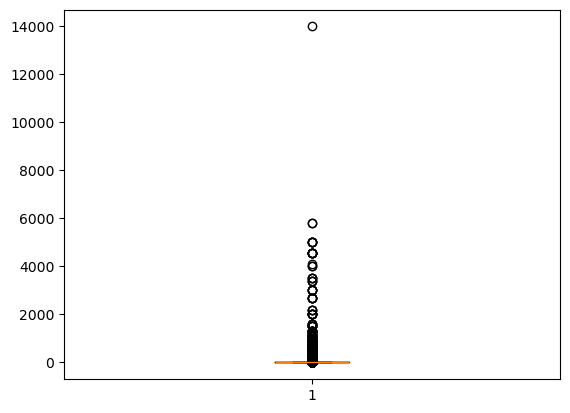

In [11]:
plt.boxplot(dataset['Price'])

In [12]:
percentile25 = dataset['Price'].quantile(0.25)

In [13]:
percentile25

9.99

In [14]:
percentile75 = dataset['Price'].quantile(0.75)

In [15]:
iqr = percentile75 - percentile25

In [16]:
high = percentile75 + 1.5*iqr

In [17]:
high

39.989999999999995

In [18]:
low = percentile25 - 1.5*iqr

In [19]:
low

-8.009999999999996

In [20]:
dataset.isnull().sum()

InventoryId    0
Store          0
City           0
Brand          0
Description    0
Size           0
onHand         0
Price          0
startDate      0
dtype: int64

In [21]:
new_df = dataset.copy()

In [22]:
new_df['Price'] = np.where(new_df['Price']>high,high,np.where(new_df['Price']<low,low,new_df['Price']))

In [23]:
new_df['Price'].skew()

0.8796784864361173

In [24]:
new_df.to_csv('EndInvFINAL12312016.csv')

In [25]:
import seaborn as sns

{'whiskers': [<matplotlib.lines.Line2D at 0x7f987d7da4d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f987d7dbd10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f987d7d96d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f987d7e1090>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f987d7e1a10>],
 'means': []}

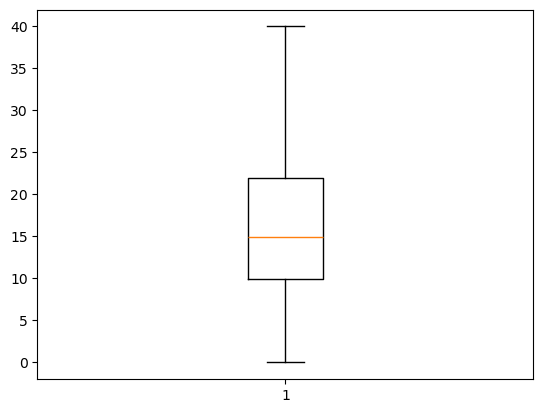

In [26]:
plt.boxplot(new_df['Price'])

In [27]:
new_df

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01
...,...,...,...,...,...,...,...,...,...
206524,79_BALLYMENA_46985,79,BALLYMENA,46985,Rodney Strong Cab Svgn Alexa,750mL,13,22.99,2016-01-01
206525,79_BALLYMENA_47014,79,BALLYMENA,47014,Juan Gil Jumilla Rd,750mL,13,13.99,2016-01-01
206526,79_BALLYMENA_47090,79,BALLYMENA,47090,Napa Cellars Cab Svgn Napa,750mL,19,23.99,2016-01-01
206527,79_BALLYMENA_90011,79,BALLYMENA,90011,Ch Pichon Longville 12 Pauil,750mL,12,39.99,2016-01-01


In [28]:
dataset

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2016-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2016-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2016-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2016-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2016-01-01
...,...,...,...,...,...,...,...,...,...
206524,79_BALLYMENA_46985,79,BALLYMENA,46985,Rodney Strong Cab Svgn Alexa,750mL,13,22.99,2016-01-01
206525,79_BALLYMENA_47014,79,BALLYMENA,47014,Juan Gil Jumilla Rd,750mL,13,13.99,2016-01-01
206526,79_BALLYMENA_47090,79,BALLYMENA,47090,Napa Cellars Cab Svgn Napa,750mL,19,23.99,2016-01-01
206527,79_BALLYMENA_90011,79,BALLYMENA,90011,Ch Pichon Longville 12 Pauil,750mL,12,144.99,2016-01-01


In [29]:
new_df.describe()

,Store,Brand,onHand,Price
count,206529.000000,206529.000000,206529.000000,206529.000000
mean,42.122457,13761.482320,20.429455,17.595111
std,23.191393,13059.429355,31.467342,10.681341
min,1.000000,58.000000,0.000000,0.000000
25%,22.000000,3746.000000,7.000000,9.990000
50%,42.000000,8010.000000,12.000000,14.990000
75%,64.000000,22143.000000,21.000000,21.990000
max,79.000000,90090.000000,1251.000000,39.990000
